In [13]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
n_task_per_file = 10
n_files = 10
base_dir = "toy_stage1_full_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [22]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [23]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.714286
1,0.500000,0.833333,0.666667,0.833333,1.000000,0.833333
2,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000
3,0.666667,0.666667,0.833333,0.666667,1.000000,1.000000
4,0.500000,0.833333,0.666667,1.000000,1.000000,0.833333
...,...,...,...,...,...,...
2,0.333333,0.333333,0.666667,1.000000,0.833333,1.000000
3,0.571429,0.714286,0.833333,0.666667,1.000000,0.857143
4,0.714286,1.000000,1.000000,1.000000,0.714286,0.714286
5,0.500000,0.833333,1.000000,1.000000,1.000000,0.666667


In [24]:
length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.258967,1.335039,1.343277,1.213959,1.163570,25.308622
1,1.166525,1.639660,1.210899,1.520978,3.322420,2.290091
2,1.178633,1.162058,22.855006,1.945941,1.403062,1.871536
3,1.175594,1.199052,1.178183,1.164617,1.214654,8.596456
4,1.148400,1.195245,1.302750,2.190853,1.208129,4.511139
...,...,...,...,...,...,...
2,1.155658,1.171592,1.260126,1.155871,1.888274,2.865289
3,1.265837,1.296774,1.318906,1.312099,1.110532,10.845224
4,1.255129,1.239288,1.188899,1.218878,1.280750,10.571216
5,1.172041,3.535756,1.342448,3.388741,1.715428,8.473410


In [25]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.774639,4.754626,5.385438,6.062667,5.715567,4.774639
1,4.747049,5.007723,4.517161,5.284633,5.598432,4.747049
2,4.853868,5.004523,4.477550,4.936360,5.975434,4.853868
3,5.547141,6.023852,5.498041,6.179695,6.447653,5.547141
4,4.162055,3.863381,4.093041,4.473121,4.453665,4.162055
...,...,...,...,...,...,...
2,5.223649,5.416037,5.412516,6.460675,5.607379,5.223649
3,4.746581,4.468225,4.880112,4.971493,4.619015,4.746581
4,4.380695,4.356718,4.505711,4.575989,5.316553,4.380695
5,4.313046,4.420057,5.686587,5.554980,6.044323,4.313046


In [26]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_72584/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_72584/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_72584/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.677070
RRT(1)         0.827033
RRT(2.5)       0.858901
RRT(5)         0.894725
RRT(10)        0.901978
Tree-values    0.909231
dtype: float64
Length :
 Naive          1.188841
RRT(1)         1.553361
RRT(2.5)       2.050790
RRT(5)         2.033834
RRT(10)        1.660215
Tree-values    8.629983
dtype: float64
MSE :
 Naive          4.516223
RRT(1)         4.543034
RRT(2.5)       4.781014
RRT(5)         5.026800
RRT(10)        5.208886
Tree-values    4.516223
dtype: float64


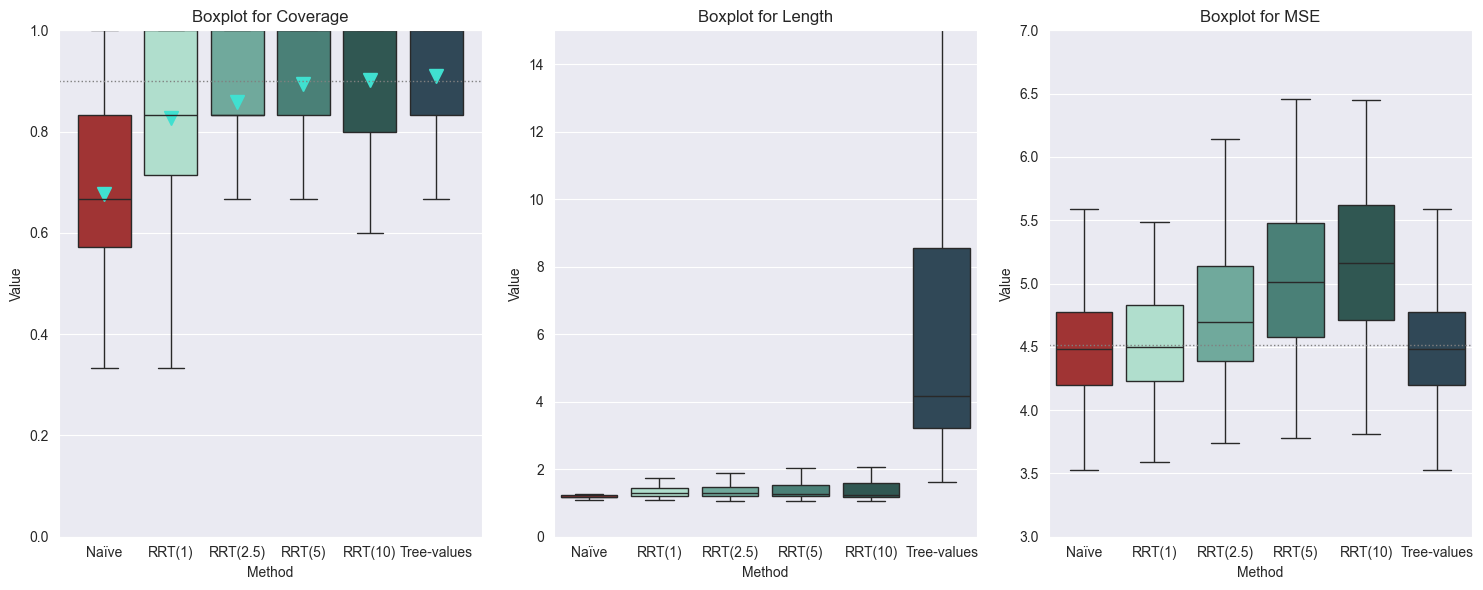

In [27]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])